# t-SNE from Scratch (ft. NumPy)

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [2]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X_mnist = pd.DataFrame(mnist["data"])
y = pd.DataFrame(mnist["target"])

X_mnist = X_mnist.sample(n=1000)
y_mnist = y.loc[X_mnist.index]

X = PCA(n_components=30).fit_transform(X_mnist)

/Users/j227487/miniconda3/envs/blog_posts/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-333.331558,-456.446787,-263.369242,-162.085339,-4.365062,-31.021833,-667.068855,-26.396279,-66.673300,268.847136,...,470.730049,-73.767453,128.358740,-0.076517,-124.842433,138.178332,-114.583977,67.238297,9.093515,-167.891776
1,538.299452,142.864199,529.547067,797.277798,567.390730,-710.850340,89.295302,438.756198,454.515708,210.698155,...,154.703208,-108.583822,430.792354,-67.697284,317.909681,-132.702753,392.870324,-256.348699,92.000614,105.523345
2,-552.014950,21.220527,-179.895460,61.701703,-214.153148,135.573132,536.935429,520.091528,-222.219835,179.504444,...,-1.335742,183.292647,169.988608,23.452535,143.747422,82.779354,-145.300971,-176.435211,132.392426,-105.409920
3,18.305024,-627.817958,9.337115,316.839174,-206.943143,364.533820,-633.727673,-495.291694,284.081335,164.114204,...,255.679809,183.244717,-66.895724,24.994914,116.105842,133.922844,-215.736431,214.279449,-1.970574,71.576471
4,537.817015,-156.254015,-156.216672,685.053213,-350.544584,754.653532,-565.310466,-47.232045,-368.857043,175.118292,...,-325.009219,53.068474,-362.912575,-139.180436,-306.758613,292.597711,240.989812,46.228465,127.481078,143.815436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-341.007424,136.511774,328.199326,337.863349,182.674889,-487.666237,-215.348013,248.260680,163.142725,27.924789,...,23.212636,314.233600,222.196472,129.727185,181.536775,215.803312,60.192027,105.923045,59.369129,-244.510119
996,597.503884,-387.495015,-596.214469,890.995828,-384.366288,-161.986133,-159.393733,647.615744,228.966955,-179.580156,...,-180.075595,170.416221,-251.729321,101.972055,-158.458349,-69.498753,144.720567,-501.930337,-137.334704,-329.975366
997,379.131267,187.419539,1317.293084,94.178742,0.327504,178.073471,80.360336,825.712278,242.815904,134.618312,...,-43.313818,-283.263218,163.807333,-326.817348,-371.763653,-56.175693,-463.929059,-150.183237,442.560739,22.972217
998,250.027690,0.764501,622.920120,-324.490669,-348.235371,143.983244,253.038342,653.420784,-395.437155,693.600901,...,248.463889,253.742324,-310.629137,-390.165746,-134.459983,36.597878,-334.751462,131.456499,-241.262494,-114.326306


In [4]:
import tsne

X = np.array(X)

p_ij = tsne.get_original_pairwise_affinities(X)

Computing Pairwise Affinities....
Completed Pairwise Affinities Matrix. 



In [5]:
pd.DataFrame(p_ij)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,4.940656e-324,2.306043e-10,8.332836e-06,4.396641e-04,2.864189e-08,1.821971e-07,1.650293e-05,5.178520e-07,6.711854e-07,2.884218e-06,...,2.069784e-04,6.430227e-04,5.206966e-09,2.947528e-07,2.894603e-04,2.671299e-04,2.927252e-08,1.162449e-10,3.542443e-07,1.947846e-05
1,1.330016e-06,4.940656e-324,6.883120e-06,1.925941e-06,2.524386e-07,6.844774e-06,1.171494e-05,3.553486e-05,2.836725e-06,2.173350e-06,...,2.161075e-06,1.949959e-07,7.719367e-08,1.157540e-07,7.059586e-06,5.773285e-04,2.701193e-05,2.332546e-05,4.863423e-07,5.923137e-08
2,7.038991e-07,1.156800e-11,4.940656e-324,2.106036e-09,2.476175e-11,1.305784e-04,1.941717e-03,2.636271e-08,5.393514e-08,4.876391e-06,...,1.214594e-06,4.565432e-09,3.859709e-16,9.865506e-05,1.189589e-03,1.047253e-06,5.225422e-11,4.675650e-10,3.010929e-06,4.935961e-05
3,3.460680e-05,3.889002e-15,4.992366e-11,4.940656e-324,7.213667e-08,2.590494e-11,4.411764e-10,1.590821e-14,1.121403e-08,1.263671e-09,...,1.216415e-10,3.268191e-04,2.000272e-11,5.782379e-13,3.000047e-10,2.526087e-08,4.956477e-12,1.168838e-15,7.907687e-12,5.166390e-11
4,1.463358e-08,8.877386e-13,1.556126e-09,3.315014e-05,4.940656e-324,1.788414e-07,1.006745e-09,5.446283e-08,9.243629e-08,2.319999e-09,...,1.231671e-10,1.137725e-04,7.241486e-09,1.094640e-10,2.903781e-11,1.761567e-10,1.672660e-05,3.202678e-11,4.001735e-11,9.126283e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.702915e-04,1.786444e-06,6.759341e-06,3.332479e-06,5.236740e-10,5.314075e-07,1.804984e-04,4.021496e-05,1.033385e-05,6.298615e-07,...,5.032184e-06,6.160844e-09,2.016099e-11,6.266021e-08,9.191115e-05,4.940656e-324,9.250768e-09,7.214419e-08,6.957819e-08,4.062306e-06
996,4.986052e-07,4.125760e-07,1.091755e-07,5.427942e-07,4.499063e-04,1.108654e-07,2.658377e-07,5.805994e-03,2.537114e-08,1.911872e-09,...,6.685041e-07,1.377580e-02,2.142264e-05,2.199433e-10,1.376752e-08,2.433314e-07,4.940656e-324,1.404631e-11,4.436856e-10,2.129017e-11
997,1.231947e-07,5.825791e-06,1.029665e-05,1.837041e-07,2.295681e-07,8.386685e-08,5.772075e-08,3.021317e-08,1.736023e-05,1.157849e-08,...,1.820977e-08,1.221634e-08,5.102225e-09,1.913187e-07,7.032566e-07,2.307603e-05,1.614817e-08,4.940656e-324,8.146924e-04,1.105548e-05
998,3.325365e-05,2.049474e-09,3.232430e-03,3.224872e-06,1.595089e-08,3.240942e-06,3.456032e-07,1.221446e-08,5.331785e-06,8.648980e-09,...,1.574786e-08,1.687911e-07,5.480635e-11,4.016381e-05,5.617608e-06,1.039525e-05,5.375583e-09,1.924440e-03,4.940656e-324,2.832768e-03


In [6]:
p_ij_symmetric = tsne.get_symmetric_p_ij(p_ij)

Computing Symmetric p_ij matrix....
Completed Symmetric p_ij Matrix. 



In [7]:
pd.DataFrame(p_ij_symmetric)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,4.940656e-324,6.651235e-10,4.518367e-09,2.371354e-07,2.163773e-11,9.910169e-11,8.264722e-09,3.628102e-08,3.355956e-10,1.634362e-09,...,1.804081e-07,6.599336e-07,1.669777e-08,1.000835e-09,1.447302e-07,2.187107e-07,2.639388e-10,6.165549e-11,1.680395e-08,2.319880e-08
1,6.651235e-10,4.940656e-324,3.441566e-09,9.629704e-10,1.262197e-10,3.422418e-09,5.857468e-09,2.378841e-08,1.418363e-09,1.086695e-09,...,1.080769e-09,9.750475e-11,1.038369e-10,5.788468e-11,3.529793e-09,2.895575e-07,1.371225e-08,1.457562e-08,2.441959e-10,2.961585e-11
2,4.518367e-09,3.441566e-09,4.940656e-324,1.077980e-12,7.904438e-13,2.870448e-07,9.865167e-07,4.790898e-08,2.697788e-11,5.019070e-09,...,5.437224e-09,1.249883e-10,4.790790e-11,1.331491e-06,5.947945e-07,3.903297e-09,5.461389e-11,5.148558e-09,1.617720e-06,1.867153e-07
3,2.371354e-07,9.629704e-10,1.077980e-12,4.940656e-324,1.661114e-08,2.886240e-12,3.101062e-13,4.724041e-10,5.668996e-12,5.664864e-11,...,9.178893e-11,1.059967e-06,1.157972e-07,1.992430e-11,1.500024e-13,1.678870e-09,2.713996e-10,9.185207e-11,1.612440e-09,4.780618e-11
4,2.163773e-11,1.262197e-10,7.904438e-13,1.661114e-08,4.940656e-324,9.810717e-11,5.034685e-13,9.803118e-09,4.621825e-11,1.489992e-12,...,4.106589e-13,7.125191e-08,3.934083e-08,1.427295e-12,1.451891e-14,3.499154e-13,2.333164e-07,1.148001e-10,7.995455e-12,1.039230e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.187107e-07,2.895575e-07,3.903297e-09,1.678870e-09,3.499154e-13,3.351017e-10,9.097562e-08,1.021733e-06,5.168234e-09,3.821652e-10,...,5.784945e-09,9.377685e-12,4.644911e-10,3.309246e-10,4.595558e-08,4.940656e-324,1.262911e-10,1.157409e-08,5.232414e-09,6.091256e-09
996,2.639388e-10,1.371225e-08,5.461389e-11,2.713996e-10,2.333164e-07,5.557049e-11,1.329197e-10,3.700881e-06,1.268557e-11,9.704984e-13,...,3.503027e-10,6.936580e-06,5.305288e-07,2.273997e-13,6.883758e-12,1.262911e-10,4.940656e-324,8.081109e-12,2.909634e-12,1.185893e-14
997,6.165549e-11,1.457562e-08,5.148558e-09,9.185207e-11,1.148001e-10,4.193362e-11,2.886038e-11,4.520521e-11,8.680114e-09,5.789398e-12,...,9.109473e-12,6.111318e-12,4.775978e-11,9.605156e-11,3.516283e-10,1.157409e-08,8.081109e-12,4.940656e-324,1.369566e-06,5.543083e-09
998,1.680395e-08,2.441959e-10,1.617720e-06,1.612440e-09,7.995455e-12,1.621567e-09,1.728018e-10,1.911051e-10,2.665892e-09,4.331343e-12,...,8.022523e-12,8.597055e-11,4.667328e-11,2.132831e-08,2.808804e-09,5.232414e-09,2.909634e-12,1.369566e-06,4.940656e-324,1.431047e-06


In [8]:
y0 = tsne.initialization(X, 2, "random")

In [9]:
pd.DataFrame(y0)

,0,1
0,-0.000175,0.000051
1,0.000024,0.000133
2,-0.000131,0.000075
3,-0.000036,0.000062
4,-0.000199,-0.000049
...,...,...
995,-0.000162,-0.000121
996,0.000199,0.000108
997,0.000145,-0.000108
998,0.000039,0.000079


In [10]:
q_ij = tsne.get_low_dimensional_affinities(y0)

In [11]:
pd.DataFrame(q_ij)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,4.940656e-324,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
1,1.001001e-06,4.940656e-324,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
2,1.001001e-06,1.001001e-06,4.940656e-324,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
3,1.001001e-06,1.001001e-06,1.001001e-06,4.940656e-324,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
4,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,4.940656e-324,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,4.940656e-324,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
996,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,4.940656e-324,1.001001e-06,1.001001e-06,1.001001e-06
997,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,4.940656e-324,1.001001e-06,1.001001e-06
998,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,4.940656e-324,1.001001e-06


In [12]:
gradient = tsne.get_gradient(p_ij_symmetric, q_ij, y0)

In [13]:
pd.DataFrame(gradient)

,0,1
0,-5.213756e-08,-2.417555e-07
1,-2.935301e-07,5.562150e-07
2,1.458316e-07,-1.765086e-07
3,-1.508294e-07,-5.875152e-08
4,2.827253e-07,-1.313955e-07
...,...,...
995,7.575050e-08,-4.518663e-07
996,-4.482721e-07,-2.121018e-07
997,-2.206477e-07,1.457114e-07
998,8.422542e-08,1.414376e-08


In [14]:
# solution, Y = tsne.low_dimensional_embedding(p_ij_symmetric, y0, T=1000, η=200, early_exaggeration=4, n_dimensions=2)

In [15]:
solution, Y = tsne.tsne(
    X, perplexity=10, T=1000, η=200, early_exaggeration=4, n_dimensions=2
)

Computing Pairwise Affinities....
Completed Pairwise Affinities Matrix. 

Computing Symmetric p_ij matrix....
Completed Symmetric p_ij Matrix. 

Optimizing Low Dimensional Embedding....
Iteration 1: Value of Cost Function is 4.4407218628032705
Iteration 50: Value of Cost Function is 2.6043458939969146
Iteration 100: Value of Cost Function is 2.360069824619912
Iteration 150: Value of Cost Function is 2.329153948890306
Iteration 200: Value of Cost Function is 2.3236072843032263
Iteration 250: Value of Cost Function is 2.32278200514743
Iteration 300: Value of Cost Function is 1.260392218425954
Iteration 350: Value of Cost Function is 1.167924074418023
Iteration 400: Value of Cost Function is 1.1404109053351825
Iteration 450: Value of Cost Function is 1.1259929975261862
Iteration 500: Value of Cost Function is 1.1172748914375779
Iteration 550: Value of Cost Function is 1.1110190161582496
Iteration 600: Value of Cost Function is 1.1066513893267738
Iteration 650: Value of Cost Function is 1.

In [16]:
pd.DataFrame(solution)

,0,1
0,67.473068,67.789721
1,-142.386273,214.355984
2,-56.591459,-21.795711
3,38.634585,103.778422
4,-45.811872,53.242905
...,...,...
995,-145.157820,58.041794
996,-126.591991,115.135627
997,99.519934,-121.565847
998,103.850281,-81.078930


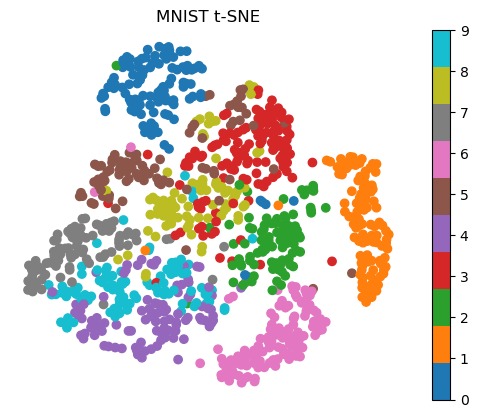

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
g1 = ax.scatter(solution[:, 0], solution[:, 1], c=y_mnist, cmap="tab10")
ax.axis("off")
ax.set_title("MNIST t-SNE")
plt.colorbar(g1, ax=ax)
plt.show()

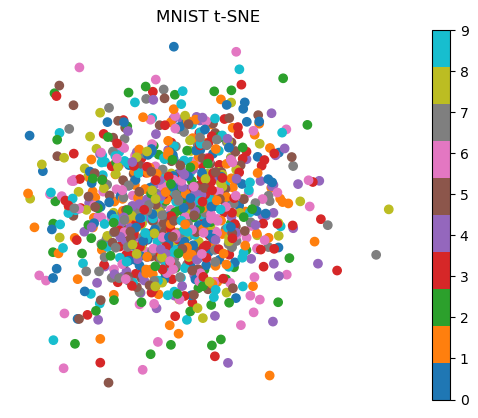

MovieWriter ffmpeg unavailable; using Pillow instead.


In [18]:
from matplotlib import animation

fig, ax = plt.subplots()
ax.axis("off")
ax.set_title("MNIST t-SNE")
scat = ax.scatter(Y[1][:, 0], Y[1][:, 1], c=y_mnist, cmap="tab10")
plt.colorbar(scat, ax=ax)
plt.show()

# t-SNE Descent Animation
ys = []
prelims = list(range(0, 50, 5))
early_range = list(range(50, 250, 10))
mid_range_1 = list(range(250, 300, 5))
mid_range_2 = list(range(300, 400, 10))
end_range = list(range(400, 1000, 50))

visual_range = (
    prelims
    + early_range
    + mid_range_1
    + mid_range_2
    + end_range
    + [999, 999, 999, 999, 999, 999, 999]
)

for i in visual_range:
    ys.append(Y[i])


def strike(text):
    result = ""
    for c in text:
        result = result + c + "\u0336"
    return result


def animate(iterations):
    scat.set_offsets(ys[iterations])
    if iterations < 31:
        ax.text(
            0.05,
            1,
            "Early Exaggeration",
            horizontalalignment="center",
            verticalalignment="center",
            transform=ax.transAxes,
        )
    else:
        ax.text(
            0.05,
            1,
            strike("                  "),
            horizontalalignment="center",
            verticalalignment="center",
            transform=ax.transAxes,
        )

    ax.set_xlim(
        [1.25 * np.min(ys[iterations][:, 0]), 1.25 * np.max(ys[iterations][:, 0])]
    )
    ax.set_ylim(
        [1.25 * np.min(ys[iterations][:, 1]), 1.25 * np.max(ys[iterations][:, 1])]
    )


rot_animation = animation.FuncAnimation(
    fig, animate, frames=len(ys) - 1, interval=350, blit=False
)

rot_animation.save("MNIST.gif", dpi=250)